In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs

In [3]:
X, y, = make_blobs(500, n_features=2, centers=4)
X, y

(array([[-8.00685531e+00,  4.08702425e+00],
        [-7.12764097e+00,  4.24296840e+00],
        [-1.17201831e-01,  6.89604399e+00],
        [ 1.04811363e+00,  6.55738898e+00],
        [-1.04313665e+01,  4.09067691e+00],
        [-8.37153868e+00,  3.13448132e+00],
        [-6.14650522e+00,  5.09694071e+00],
        [-5.52464092e+00,  1.86435338e+00],
        [-4.73654795e+00,  5.27756509e+00],
        [-1.58264920e+00, -5.13701366e+00],
        [ 1.32013456e+00, -5.34612409e+00],
        [-2.21554967e-01,  7.94387886e+00],
        [ 1.18090760e+00, -5.54420252e+00],
        [-2.89862461e-01, -4.90943783e+00],
        [ 8.45070715e-01,  6.44141655e+00],
        [ 3.53892613e-01, -5.29203373e+00],
        [ 1.83252542e+00,  6.11136242e+00],
        [-1.59477066e+00, -4.63657556e+00],
        [-3.85414407e+00,  2.86444488e+00],
        [ 4.26080811e-01, -3.10938924e+00],
        [-5.13640141e+00,  6.07508746e+00],
        [-7.06623556e+00,  2.51151806e+00],
        [-9.51739260e+00,  4.835

In [8]:
fig, ax = plt.subplots(figsize=(2, 2))

for cl in range(4):
    ax.plot(X[y == cl, 0], X[y == cl, 1], color=plt.get_cmap("tab10")(cl / 4), marker=',', lw=0, linestyle='')
ax.axis('off')
fig.tight_layout()

fig.canvas.draw()
rgb = [int(px) for px in fig.canvas.tostring_rgb()]
n_px = len(rgb)
colors = 3
height = width = int(np.sqrt(n_px / colors))

rgb_grouped = np.array([rgb[i:i+3] for i in range(0, len(rgb), 3)]).reshape((height, width, colors)).astype(np.uint8)
plt.close(fig)

# import tempfile

# with open("/tmp/eraseme.png", "wb") as fhandle:
#     plt.savefig(fhandle, format='png', pad_inches=0.0, bbox_inches='tight')
# from skimage import io

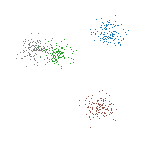

In [9]:
from PIL import Image
Image.fromarray(rgb_grouped).show()

In [73]:
from PIL import Image

EMPTY = -1

def step_region_growth(img) -> bool:
    changed = False
    rows, cols = img.shape
    old_img = img.copy()
    for i in range(rows):
        for j in range(cols):
            if old_img[i, j] == EMPTY:
                continue
            for di, dj in ((0, 1), (0, -1), (1, 0), (-1, 0)):
                if not (0 <= i + di < rows and 0 <= j + dj < cols) or di == dj == 0:
                    continue
                if old_img[i + di, j + dj] == EMPTY:
                    img[i + di, j + dj] = img[i, j]
                    changed = True

    return changed


def region_growth(img, inplace=False) -> np.ndarray:
    if not inplace:
        img = img.copy()

    while step_region_growth(img):
        pass

    return img


def prepare_img(img, cmap="tab10") -> Image:
    cmap = plt.get_cmap(cmap)
    from matplotlib.colors import Normalize

    norm = Normalize(0, np.max(img))
    rows, cols = img.shape
    new_img = np.zeros((rows, cols, 4), dtype=np.float32)
    for i in range(rows):
        for j in range(cols):
            if img[i, j] == EMPTY:
                new_img[i, j, :] = 0.0
            else:
                new_img[i, j, :] = cmap(norm(img[i, j]))
    return Image.fromarray((new_img * 255.0).astype(np.uint8), mode="RGBA")


In [74]:
img = io.imread("/tmp/eraseme.png")
img

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

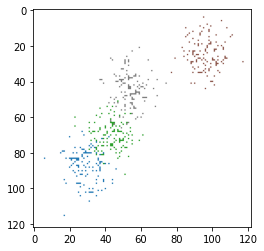

In [75]:
plt.imshow(Image.fromarray(img))

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
img.shape

(122, 122, 4)

In [78]:
np.apply_along_axis(lambda sl: ' '.join(map(str, sl)), 2, img)

array([['255 255 255 0', '255 255 255 0', '255 255 255 0', ...,
        '255 255 255 0', '255 255 255 0', '255 255 255 0'],
       ['255 255 255 0', '255 255 255 0', '255 255 255 0', ...,
        '255 255 255 0', '255 255 255 0', '255 255 255 0'],
       ['255 255 255 0', '255 255 255 0', '255 255 255 0', ...,
        '255 255 255 0', '255 255 255 0', '255 255 255 0'],
       ...,
       ['255 255 255 0', '255 255 255 0', '255 255 255 0', ...,
        '255 255 255 0', '255 255 255 0', '255 255 255 0'],
       ['255 255 255 0', '255 255 255 0', '255 255 255 0', ...,
        '255 255 255 0', '255 255 255 0', '255 255 255 0'],
       ['255 255 255 0', '255 255 255 0', '255 255 255 0', ...,
        '255 255 255 0', '255 255 255 0', '255 255 255 0']], dtype='<U13')

In [80]:
pixel_classes = LabelEncoder().fit_transform(np.apply_along_axis(lambda sl: ' '.join(map(str, sl)), 2, img).ravel()).reshape(img.shape[:2])

In [81]:
pixel_classes

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

In [82]:
np.unique(pixel_classes)


array([0, 1, 2, 3, 4])

In [83]:
pixel_classes[pixel_classes == 2] = EMPTY

In [84]:
grown = region_growth(pixel_classes)

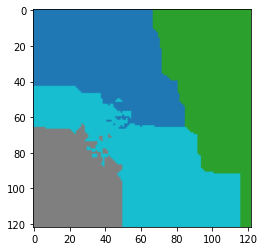

In [85]:
plt.imshow(prepare_img(grown))